In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# 그래프에서 한글 깨짐 방지
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')

#멧플로립에서 음수를 표시
plt.rc('axes',unicode_minus=False)

#워닝 메시지
import warnings
warnings.filterwarnings('ignore')

In [16]:
df=pd.read_csv('../외감기업/raw_data/t-1_raw_외감.csv',encoding='euc-kr')

In [18]:
for i in df.index :
    if (df.loc[i,'OCF(천원)'] < 0) & (df.loc[i,'ICF(천원)'] < 0) &(df.loc[i,'FCF(천원)'] > 0) :
        df.loc[i,'기업수명주기'] = '도입기'
    elif (df.loc[i,'OCF(천원)'] > 0) & (df.loc[i,'ICF(천원)'] < 0) &(df.loc[i,'FCF(천원)'] > 0) :
        df.loc[i,'기업수명주기'] = '성장기'
    elif (df.loc[i,'OCF(천원)'] > 0) & (df.loc[i,'ICF(천원)'] < 0) &(df.loc[i,'FCF(천원)'] < 0) :
        df.loc[i,'기업수명주기'] = '성숙기'
    elif (df.loc[i,'OCF(천원)'] < 0) & (df.loc[i,'ICF(천원)'] > 0):
        df.loc[i,'기업수명주기'] = '쇠퇴기'
    else :
        df.loc[i,'기업수명주기'] = '수축기'

In [19]:
df['자산총계(천원)'] = df['자산총계(천원)'] * 1000
df['log자산총계'] = np.log(df['자산총계(천원)'])
df['잉여현금흐름(FCF)']=df['OCF(천원)']-df['ICF(천원)']
df['전체현금흐름(천원)']=df['OCF(천원)']+df['ICF(천원)']+df['FCF(천원)']

df['총자산대비잉여현금흐름'] = df['잉여현금흐름(FCF)']/df['자산총계(천원)']
df['총자산대비현금흐름'] = df['전체현금흐름(천원)'] / df['자산총계(천원)']
df=df[['회사명', '거래소코드','유동자산회전률', '총자산대비잉여현금흐름','자기자본구성비율', 'log자산총계','자기자본회전률', '순운전자본회전률', '자기자본증가율', '총자본증가율', '총자산대비현금흐름', '총자본투자효율','기업수명주기','t-1감사의견코드']]

---
- 결측치, 무한대값 삭제

In [20]:
df.isna().sum()
df.dropna(axis=0,inplace=True)

In [21]:
df.isin([np.inf,-np.inf]).sum()
df = df.replace([np.inf, -np.inf], np.nan)  # inf 값을 NaN으로 대체
df = df.dropna()  # NaN이 있는 행 삭제

---

In [22]:
# std, Mean·Median
df.describe()

,거래소코드,유동자산회전률,총자산대비잉여현금흐름,자기자본구성비율,log자산총계,자기자본회전률,순운전자본회전률,자기자본증가율,총자본증가율,총자산대비현금흐름,총자본투자효율,t-1감사의견코드
count,188632.000000,188632.000000,188632.000000,188632.000000,188632.000000,1.886320e+05,188632.000000,1.886320e+05,188632.000000,1.886320e+05,188632.000000,188632.000000
mean,57668.828921,7.222784,0.000188,38.189427,24.107570,2.545350e+01,1.836898,8.810251e+01,11.691526,1.006807e-05,22.918809,0.071430
std,25364.722797,1303.567886,0.035730,27.920730,1.047462,5.713013e+03,132.823897,1.039052e+04,1183.568960,1.077189e-04,2122.426734,0.257543
min,10000.000000,-886.600000,-0.013627,-22.870000,13.815511,-4.050000e+00,-7.110000,-1.299710e+03,-100.000000,-5.389148e-03,-680430.510000,0.000000
25%,41837.000000,0.990000,-0.000004,14.490000,23.405923,4.900000e-01,0.410000,0.000000e+00,-2.320000,-1.192663e-05,4.520000,0.000000
50%,59713.000000,2.120000,0.000077,34.910000,23.887455,1.840000e+00,1.030000,1.190000e+00,0.000000,9.464303e-07,11.490000,0.000000
75%,76679.000000,3.770000,0.000211,59.190000,24.605937,4.520000e+00,1.740000,1.199000e+01,10.230000,2.716033e-05,19.970000,0.000000
max,107278.000000,561521.620000,15.517038,106.700000,31.807494,2.404983e+06,57115.340000,3.182429e+06,513178.820000,2.498063e-03,345127.770000,1.000000


In [23]:
import numpy as np

# 컬럼 이름
column_name = '자기자본증가율'

# 하위 1%, 상위 1% 값을 계산
lower_bound = df[column_name].quantile(0.005)
upper_bound = df[column_name].quantile(0.995)

# 1% 미만 및 1% 초과 데이터 선택 후 삭제
df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

In [24]:
import numpy as np

# 컬럼 이름
column_name = '유동자산회전률'

# 하위 1%, 상위 1% 값을 계산
lower_bound = df[column_name].quantile(0.005)
upper_bound = df[column_name].quantile(0.995)

# 1% 미만 및 1% 초과 데이터 선택 후 삭제
df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

In [25]:
import numpy as np

# 컬럼 이름
column_name = '총자산대비현금흐름'

# 하위 1%, 상위 1% 값을 계산
lower_bound = df[column_name].quantile(0.005)
upper_bound = df[column_name].quantile(0.995)

# 1% 미만 및 1% 초과 데이터 선택 후 삭제
df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

---

In [26]:
scaler=MinMaxScaler()
df.iloc[:,2:12]=scaler.fit_transform(df.iloc[:,2:12])

In [27]:
# dp-Score의 계수
coefficients = {
    '유동자산회전률':np.exp(0.47765086),                    # 높아야 좋다
    '총자산대비잉여현금흐름':np.exp(0.53785436),            # 높아야 좋다
    '자기자본구성비율':np.exp(0.49360789),                  # 높아야 좋다
    'log자산총계':np.exp(0.94238478),                      # 높아야 좋다
    '자기자본회전률':np.exp(-0.08646556),                   # 높아야 좋다
    '순운전자본회전률':np.exp(-0.98107367),                 # 높아야 좋다
    '자기자본증가율':np.exp(0.19544705),                    # 높아야 좋다
    '총자본증가율':np.exp(0.44094258),                      # 높아야 좋다
    '총자산대비현금흐름':np.exp(-0.37036301),               # 높아야 좋다
    '총자본투자효율':np.exp(0.26458857),                    # 높아야 좋다

    'constant': 0.90495308
}


# O-Score 계산
df['dp_score'] = coefficients['constant']
df['dp_score'] += coefficients['유동자산회전률'] * df['유동자산회전률']
df['dp_score'] += coefficients['총자산대비잉여현금흐름'] * df['총자산대비잉여현금흐름']
df['dp_score'] += coefficients['자기자본구성비율'] * df['자기자본구성비율']
df['dp_score'] += coefficients['log자산총계'] * df['log자산총계']
df['dp_score'] += coefficients['자기자본회전률'] * df['자기자본회전률']
df['dp_score'] += coefficients['순운전자본회전률'] * df['순운전자본회전률']
df['dp_score'] += coefficients['자기자본증가율'] * df['자기자본증가율']
df['dp_score'] += coefficients['총자본증가율'] * df['총자본증가율']
df['dp_score'] += coefficients['총자산대비현금흐름'] * df['총자산대비현금흐름']
df['dp_score'] += coefficients['총자본투자효율'] * df['총자본투자효율']

# 로지스틱 함수를 이용해 부도 확률 계산
# df_등급화['default_probability'] = 1 / (1 + np.exp(-df_등급화['dp_score']))

In [28]:
df.shape

(183887, 15)

In [29]:
df.describe()

,거래소코드,유동자산회전률,총자산대비잉여현금흐름,자기자본구성비율,log자산총계,자기자본회전률,순운전자본회전률,자기자본증가율,총자본증가율,총자산대비현금흐름,총자본투자효율,t-1감사의견코드,dp_score
count,183887.000000,183887.000000,183887.000000,183887.000000,183887.000000,1.838870e+05,183887.000000,183887.000000,183887.000000,183887.000000,183887.000000,183887.000000,183887.000000
mean,57339.767711,0.091181,0.000890,0.472503,0.567562,1.983453e-05,0.028046,0.094330,0.000217,0.464190,0.667033,0.071294,4.599117
std,25339.667481,0.104455,0.002330,0.214346,0.058517,2.403682e-03,0.031826,0.057020,0.002334,0.093139,0.001954,0.257316,0.436598
min,10000.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.731496
25%,41619.000000,0.030385,0.000877,0.292274,0.527947,9.304649e-07,0.008651,0.081536,0.000190,0.437382,0.667017,0.000000,4.271086
50%,59356.000000,0.064079,0.000882,0.447789,0.555006,3.222166e-06,0.021215,0.082833,0.000195,0.452625,0.667024,0.000000,4.592531
75%,76334.500000,0.112816,0.000891,0.633403,0.595385,7.736644e-06,0.035839,0.093571,0.000215,0.483790,0.667032,0.000000,4.919107
max,107278.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.470862


In [30]:
df[df['t-1감사의견코드']==1]['dp_score'].mean()

4.4141268217511875

In [31]:
df[df['t-1감사의견코드']==0]['dp_score'].mean()

4.613318468681839

- AA	4.859760
- A	4.704991
- BBB	4.456432
- BB	4.253703
- B	4.105671
- C	3.954838

In [32]:
df[df['t-1감사의견코드']==1]['기업수명주기'].value_counts()

성장기    4591
도입기    3871
수축기    2043
성숙기    1560
쇠퇴기    1045
Name: 기업수명주기, dtype: int64

In [33]:
df[df['t-1감사의견코드']==0]['기업수명주기'].value_counts()

성숙기    50978
수축기    37714
성장기    35302
도입기    29288
쇠퇴기    17495
Name: 기업수명주기, dtype: int64

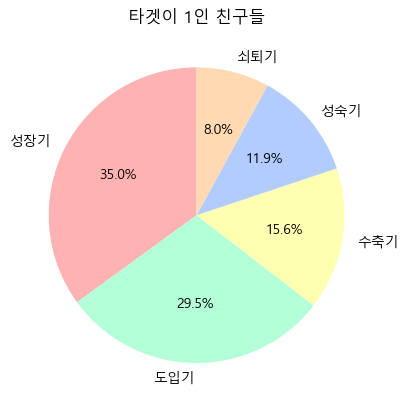

In [46]:
# 파이차트 그리기
labels=['성장기','도입기','수축기','성숙기','쇠퇴기']
sizes=[4591,3871,2043,1560,1045]
colors=  ['#FFB2B2', '#B2FFD8', '#FFFFB2', '#B2CCFF', '#FFD9B2']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# 제목 추가
plt.title('타겟이 1인 친구들')

# 그래프 보여주기
plt.show()

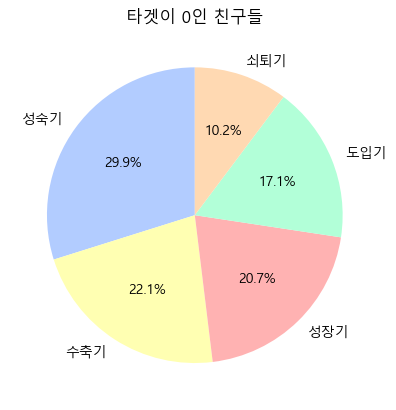

In [47]:
# 파이차트 그리기
labels=['성숙기','수축기','성장기','도입기','쇠퇴기']
sizes=[50978,37714,35302,29288,17495]
colors=  ['#B2CCFF', '#FFFFB2', '#FFB2B2', '#B2FFD8', '#FFD9B2']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# 제목 추가
plt.title('타겟이 0인 친구들')

# 그래프 보여주기
plt.show()

----

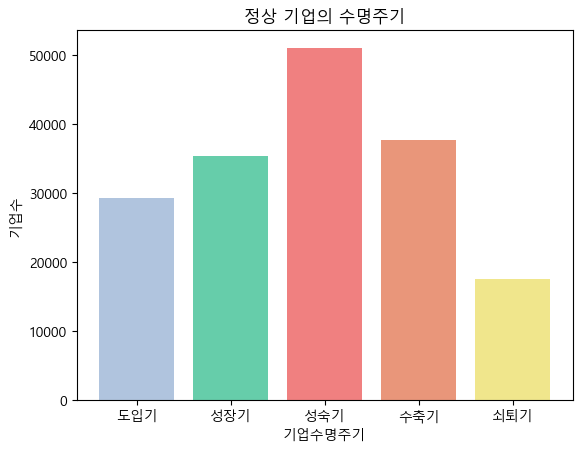

In [64]:
import matplotlib.pyplot as plt

labels = ['도입기', '성장기', '성숙기', '수축기', '쇠퇴기']
sizes = [29288, 35302, 50978, 37714, 17495]

# 색상을 이쁘게 설정해보세요
colors = ['lightsteelblue', 'mediumaquamarine', 'lightcoral', 'darksalmon', 'khaki']

plt.bar(labels, sizes, color=colors)
plt.xlabel('기업수명주기')
plt.ylabel('기업수')
plt.title('정상 기업의 수명주기')
plt.show()
